In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

df_prod = pd.read_excel('Data pord.xlsx')
df_prod.head()

,Material,Order,Batch,Release Date (actual),Actual finish,Plant
0,43115-14,7583861,1591358,2009-10-09,2010-01-08,2170
1,43115-14,7633752,1854825,2009-11-23,2010-01-08,2170
2,43115-14,7633754,1854835,2009-11-23,2010-01-04,2170
3,43115-14,7638593,1866511,2009-11-30,2010-01-08,2170
4,43115-14,7638594,1866516,2009-11-30,2010-01-05,2170


In [2]:
df_prod.shape

(2740, 6)

In [3]:
df_prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2740 entries, 0 to 2739
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Material               2740 non-null   object        
 1   Order                  2740 non-null   int64         
 2   Batch                  2740 non-null   int64         
 3   Release Date (actual)  2740 non-null   datetime64[ns]
 4   Actual finish          2740 non-null   datetime64[ns]
 5   Plant                  2740 non-null   int64         
dtypes: datetime64[ns](2), int64(3), object(1)
memory usage: 128.6+ KB


In [4]:
df_prod.isnull().sum()

Material                 0
Order                    0
Batch                    0
Release Date (actual)    0
Actual finish            0
Plant                    0
dtype: int64

In [5]:
df_prod['Time'] = (pd.to_datetime('today').normalize()-df_prod['Actual finish']).dt.days

In [6]:
df_prod.head()

,Material,Order,Batch,Release Date (actual),Actual finish,Plant,Time
0,43115-14,7583861,1591358,2009-10-09,2010-01-08,2170,4631
1,43115-14,7633752,1854825,2009-11-23,2010-01-08,2170,4631
2,43115-14,7633754,1854835,2009-11-23,2010-01-04,2170,4635
3,43115-14,7638593,1866511,2009-11-30,2010-01-08,2170,4631
4,43115-14,7638594,1866516,2009-11-30,2010-01-05,2170,4634


In [7]:
df_Sus = df_prod.loc[:,("Material","Time")]
df_Sus['Failure'] = 0
df_Sus.rename(columns={"Material":"Part Number"}, inplace=True)
df_Sus.head()

,Part Number,Time,Failure
0,43115-14,4631,0
1,43115-14,4631,0
2,43115-14,4635,0
3,43115-14,4631,0
4,43115-14,4634,0


In [8]:
df_war = pd.read_excel('Data Warranty.xlsx')
df_war.head()

,Plant,Network/Order,Sales Order,Notification,Customer PO,Incoming P/N,Incoming P/N Desc,Outgoing P/N,Incoming S/N,Outgoing S/N,...,Ship To Name,Order Status,Goodrich Organization,Airline_Code,RCS-RRC,RCS-FFC,RCS-FFI,RCS-FCR,RCS-FHS,SAS-SAC
0,2207,40568776,4067123,301631440,21349645-44,43100-12,"POWERED DRIVE UNIT, SHORT BASE SELF-LIFT",43100-12,1462333,1462333,...,Qatar Airways,INVCD,Cargo,QTR,U,FT,NI,CR,HW,REPR
1,2207,40610690,4097943,301652886,21354298-44,43100-12,"POWERED DRIVE UNIT, SHORT BASE SELF-LIFT",43100-12,2669973,2669973,...,Qatar Airways,INVCD,Cargo,QTR,U,FT,NI,CR,HW,REPR
2,2207,40588348,4072123,301637026,21348932-44,7713402-37,RAIL ASSEMBLY,7713402-37,QR35052,QR35052,...,Qatar Airways,INVCD,Cargo,QTR,U,FT,NI,CR,HW,REPR
3,2207,40601524,4088178,301646356,21352421-44,43100-12,"POWERED DRIVE UNIT, SHORT BASE SELF-LIFT",43100-12,2465598,2465598,...,Qatar Airways,INVCD,Cargo,QTR,U,FT,NI,CR,HW,REPR
4,2207,40568771,4067108,301631435,21348520-44,77FV110-1,AUX CL SIDE-LOCK ASSEMBLY,77FV110-1,2732907,2732907,...,Qatar Airways,INVCD,Cargo,QTR,U,FT,IN,NaN,NaN,REPR


In [9]:
df_war.shape

(20697, 38)

In [10]:
df_war.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20697 entries, 0 to 20696
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Plant                  20697 non-null  int64         
 1   Network/Order          20697 non-null  int64         
 2   Sales Order            20697 non-null  int64         
 3   Notification           20697 non-null  int64         
 4   Customer PO            20697 non-null  object        
 5   Incoming P/N           20697 non-null  object        
 6   Incoming P/N Desc      20697 non-null  object        
 7   Outgoing P/N           20697 non-null  object        
 8   Incoming S/N           19148 non-null  object        
 9   Outgoing S/N           19148 non-null  object        
 10  Incoming TSN           8003 non-null   object        
 11  Outgoing TSN           7718 non-null   object        
 12  Incoming CSN           7939 non-null   object        
 13  O

In [11]:
df_war.isnull().sum()

Plant                        0
Network/Order                0
Sales Order                  0
Notification                 0
Customer PO                  0
Incoming P/N                 0
Incoming P/N Desc            0
Outgoing P/N                 0
Incoming S/N              1549
Outgoing S/N              1549
Incoming TSN             12694
Outgoing TSN             12979
Incoming CSN             12758
Outgoing CSN             13036
Manufacture Date          2705
Tail Number               2422
Core Receipt Date            0
Days to Failure           2705
Utilisation factor       14952
Main Work Center             0
Workscope                    0
Order TECO Date              0
Shipment Date                0
Invoice Date                 0
Receipt Qty                  0
Customer                     0
Customer Name                0
Ship To                      0
Ship To Name                 0
Order Status                 0
Goodrich Organization        0
Airline_Code                 0
RCS-RRC 

In [12]:
df_war_updated = df_war.dropna(subset=['Manufacture Date']).reset_index(drop=True)

In [13]:
df_war_updated.isnull().sum()

Plant                        0
Network/Order                0
Sales Order                  0
Notification                 0
Customer PO                  0
Incoming P/N                 0
Incoming P/N Desc            0
Outgoing P/N                 0
Incoming S/N               658
Outgoing S/N               658
Incoming TSN             10619
Outgoing TSN             10784
Incoming CSN             10672
Outgoing CSN             10831
Manufacture Date             0
Tail Number               1964
Core Receipt Date            0
Days to Failure              0
Utilisation factor       12247
Main Work Center             0
Workscope                    0
Order TECO Date              0
Shipment Date                0
Invoice Date                 0
Receipt Qty                  0
Customer                     0
Customer Name                0
Ship To                      0
Ship To Name                 0
Order Status                 0
Goodrich Organization        0
Airline_Code                 0
RCS-RRC 

In [14]:
df_war_updated['Time'] = (df_war_updated['Core Receipt Date'] - df_war_updated['Manufacture Date']).dt.days

In [15]:
df_war_updated['RCS-FFI'].unique()

array(['NI', 'IN', nan], dtype=object)

In [16]:
import math
TTF = []
TTS = []
Failure = []
for i in range(len(df_war_updated['RCS-FFI'])):
    if df_war_updated['RCS-FFI'][i] == "NI":
        TTF.append(df_war_updated['Time'][i])
        Failure.append(1)
    elif df_war_updated['RCS-FFI'][i] == math.nan:
        TTF.append(df_war_updated['Time'][i])
        Failure.append(1)
    else:
        TTS.append(df_war_updated['Time'][i])
        Failure.append(0)

In [17]:
print(len(TTF),len(TTS))

15056 2936


In [18]:
TTS2 = list (df_prod['Time'])
for i in TTS2:
    TTS.append(i)
print(len(TTS))

5676


In [19]:
df_war_updated["Failure"] = Failure

In [20]:
df_fail = df_war_updated.loc[:,('Incoming P/N','Time','Failure')]
df_fail.rename(columns={'Incoming P/N': 'Part Number'}, inplace=True)   
df_fail.head()

,Part Number,Time,Failure
0,43212-12,1828,1
1,77FV010-1,1099,0
2,43213-12,2106,0
3,43212-12,2919,1
4,43213-11,375,1


In [21]:
comp = input("Enter the Part Number for which Parametric analysis to be done: ")

Enter the Part Number for which Parametric analysis to be done: 43115-16


In [22]:
comp_Susdf = df_Sus.loc[(df_Sus["Part Number"] == comp)].reset_index(drop=True)
comp_faildf = df_fail.loc[(df_fail["Part Number"] == comp)].reset_index(drop=True)

In [23]:
df_final = pd.concat([comp_Susdf, comp_faildf])
df_final.head()

,Part Number,Time,Failure
0,43115-16,231,0
1,43115-16,272,0
2,43115-16,272,0
3,43115-16,272,0
4,43115-16,294,0


In [51]:
TTF = list(df_final[df_final['Failure'] == 1]['Time'])
TTS = list(df_final[df_final['Failure'] == 0]['Time'])

In [55]:
negTTF = [ele for ele in TTF if ele < 0]
negTTS = [ele for ele in TTS if ele < 0]
print("The percentage of negative time to failure and time to suspend data in the dataset ",round(len(negTTF)/len(TTF),4)*100,"%"," ",round(len(negTTS)/len(TTS)*100,4),"%"," respectively")

The percentage of negative time to failure and time to suspend data in the dataset  0.0 %   0.0 %  respectively


In [56]:
TTF_cleaned = [ele for ele in TTF if ele > 0]
TTS_cleaned = [ele for ele in TTS if ele > 0]

Results from Fit_Everything:
Analysis method: MLE
Failures / Right censored: 25/473 (94.97992% right censored) 

   Distribution   Alpha     Beta   Gamma      Mu   Sigma      Lambda  Log-likelihood    AICc     BIC      AD optimizer
       Gamma_2P 4012.19  1.54591                                            -262.723  529.47 537.867 64.1745       TNC
     Weibull_2P 4346.77  1.68909                                            -262.769 529.562 537.958 63.0477  L-BFGS-B
 Loglogistic_2P 5334.11  1.51895                                            -262.847 529.719 538.116 64.3162       TNC
 Exponential_2P                  41.9999                 7.23689e-05        -263.343 530.711 539.108 67.0958       TNC
   Lognormal_2P                          9.31396 1.63271                    -263.468  530.96 539.357 66.4417       TNC
     Weibull_3P 5934.13  1.43173 17.9993                                    -262.514 531.076 543.659 63.9868       TNC
       Gamma_3P 4818.96  1.42723 20.2304              

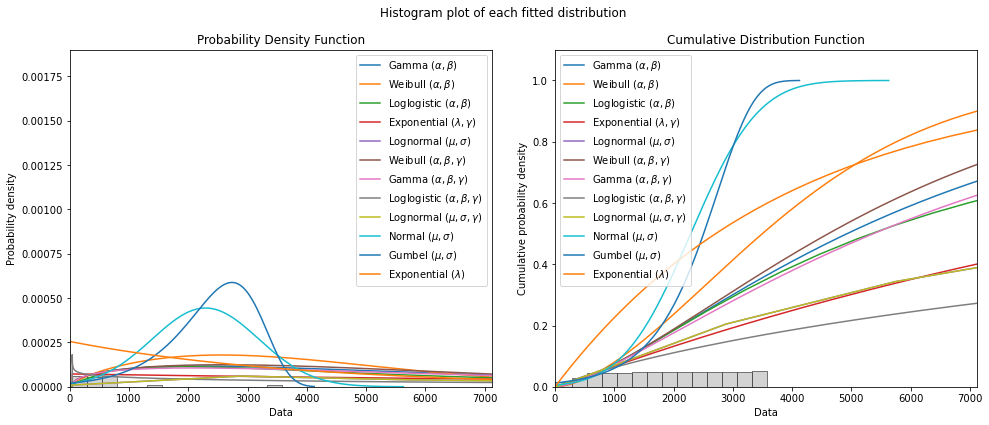

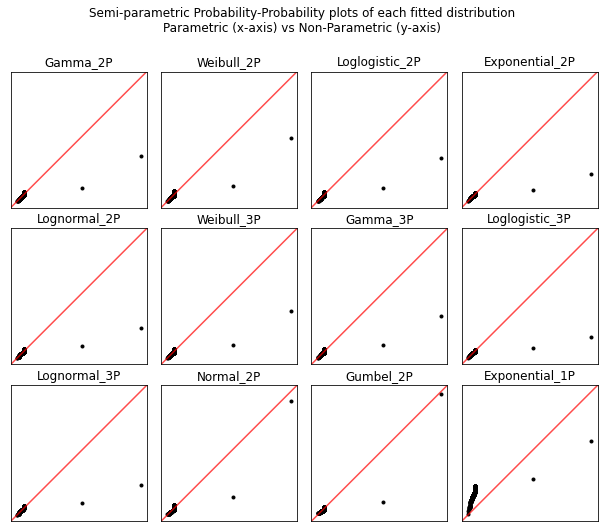

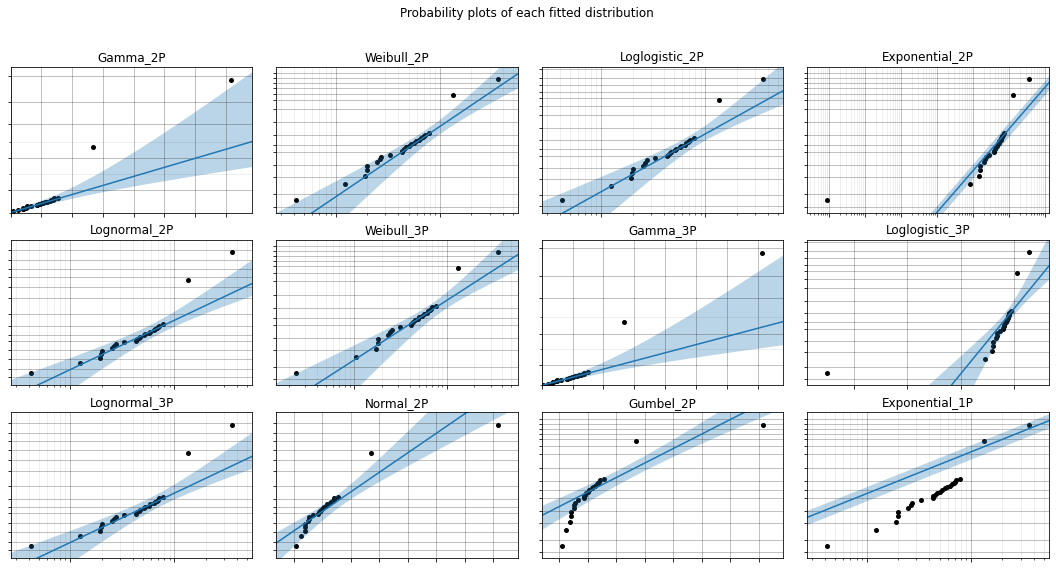

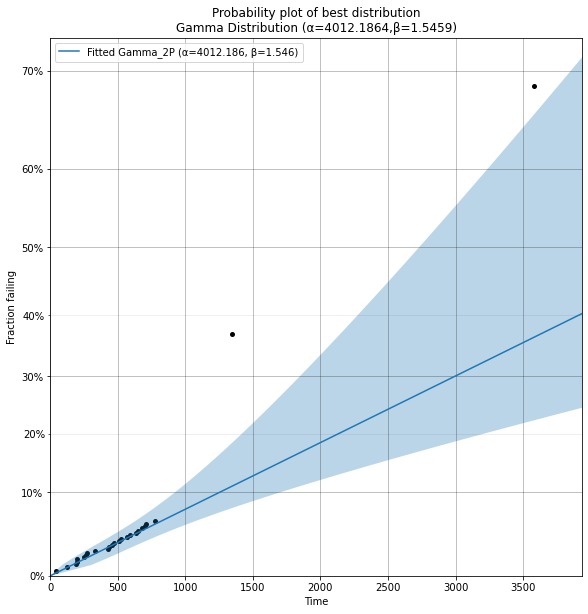

The best fitting distribution was Gamma_2P which had parameters [4.01218641e+03 1.54591235e+00 0.00000000e+00]


In [79]:
import matplotlib.pyplot as plt
from reliability.Fitters import Fit_Everything

results = Fit_Everything(failures=TTF_cleaned, right_censored=TTS_cleaned)

print('The best fitting distribution was', results.best_distribution_name, 'which had parameters', results.best_distribution.parameters)
plt.show()

In [80]:
print("The AD for best fitted distribution is ",results.Gamma_2P_AD,"and for weibull 2 parameter",results.Weibull_2P_AD,".","\nAs the difference is not that much and simplicity the weibull 2 parameter distribution is assumed")

The AD for best fitted distribution is  64.17447095088829 and for weibull 2 parameter 63.047726267083156 
As the difference is not that much and simplicity the weibull 2 parameter distribution is assumed


In [98]:
from reliability.Fitters import Fit_Weibull_2P

weibull_fit = Fit_Weibull_2P(failures = TTF_cleaned, right_censored = TTS_cleaned, show_probability_plot = False, quantiles = [0.])
plt.show()

Results from Fit_Weibull_2P (95% CI):
Analysis method: Maximum Likelihood Estimation (MLE)
Optimizer: L-BFGS-B
Failures / Right censored: 25/473 (94.97992% right censored) 

Parameter  Point Estimate  Standard Error  Lower CI  Upper CI
    Alpha         4346.77         1121.38   2621.65   7207.08
     Beta         1.68909         0.24765   1.26721    2.2514 

Goodness of fit    Value
 Log-likelihood -262.769
           AICc  529.562
            BIC  537.958
             AD  63.0477 



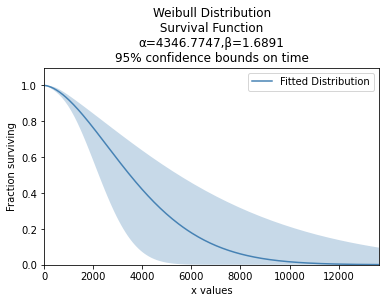

In [89]:
from reliability.Probability_plotting import plot_points

weibull_fit.distribution.SF(label='Fitted Distribution',color='steelblue')
#plot_points(failures=TTF_cleaned,func='SF',label='failure data',color='red',alpha=1)
plt.legend()
plt.show()

In [95]:
pip freeze

alabaster==0.7.12Note: you may need to restart the kernel to use updated packages.
anaconda-client==1.7.2
anaconda-navigator==1.10.0
anaconda-project==0.8.3
appdirs==1.4.4
argh==0.26.2
argon2-cffi @ file:///C:/ci/argon2-cffi_1596828585465/work
asn1crypto @ file:///tmp/build/80754af9/asn1crypto_1596577642040/work
astroid @ file:///C:/ci/astroid_1592487315634/work
astropy==4.0.2
async-generator==1.10
atomicwrites==1.4.0
attrs @ file:///tmp/build/80754af9/attrs_1604765588209/work
autograd==1.3
autograd-gamma==0.5.0
autopep8 @ file:///tmp/build/80754af9/autopep8_1596578164842/work

Babel @ file:///tmp/build/80754af9/babel_1605108370292/work
backcall==0.2.0
backports.functools-lru-cache==1.6.1
backports.shutil-get-terminal-size==1.0.0
backports.tempfile==1.0
backports.weakref==1.0.post1
bcrypt @ file:///C:/ci/bcrypt_1597936263757/work
beautifulsoup4 @ file:///tmp/build/80754af9/beautifulsoup4_1601924105527/work
bitarray @ file:///C:/ci/bitarray_1605065210072/work
bkcharts==0.2
bleach @ file

In [99]:
pip freeze | %{$_.split('==')[0]} | %{pip install --upgrade $_}

Note: you may need to restart the kernel to use updated packages.


'%{$_.split' is not recognized as an internal or external command,
operable program or batch file.
